決定木とランダムフォレスト
 - 決定木
 - ランダムフォレスト
 - ランダムフォレスト回帰
 - ランダムフォレストによる数字分類

決定木  
→質問によってデータを分類  
　分類する要素のバラツキが最も小さくなるように質問を設定(特徴量を設定)
ランダムフォレスト  
→決定木を組み合わせる  


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

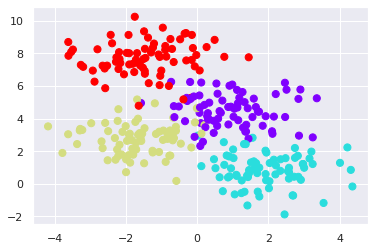

In [ ]:
#決定木の構築
#とりあえずランダムに分類データを生成
#300データ4クラス標準偏差1
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [ ]:
#sklearnの決定木はDecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    #データの点表示
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #全範囲をカバーするようなmeshgridを作成して予測
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    #xxとyyを連結して入力
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    #分類の範囲描画
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


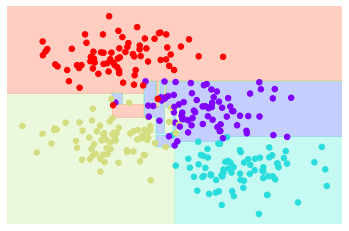

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [ ]:
#決定木の深さによって分類の境界がどう変わるか分かるインタラクティブなグラフ
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);
#→同じクラスの範囲に見えるのに分かれている範囲もあって精度は微妙

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

In [ ]:
#ランダムフォレストを使ったもの
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)
#→外れ値の点の部分も分類できていて精度は上がったが過学習してる

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

ランダムフォレスト  
→決定木を複数組み合わせてバギング  
バギング  
→弱学習機を使って多数決を取る

アンサンブル学習  
→弱学習機を組み合わせること  
　例：バギング  
　　　ブースティング  
　　　→前の弱学習機の結果を使って，上手く学習できなかった部分を重点的に学習


https://spjai.com/regression-tree/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


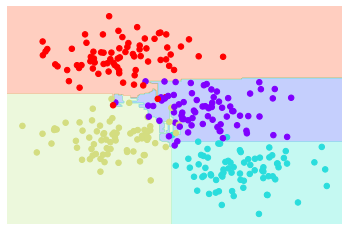

In [ ]:
#sklearnのバギングはBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
#弱学習機の数：100，弱学習機1個あたりが学習するデータ：80％
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


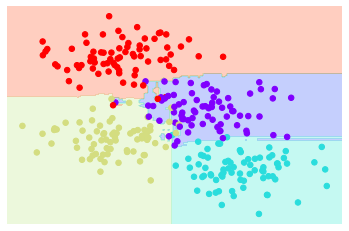

In [ ]:
#sklearnのランダムフォレスト(分類)はRandomForestClassifier
#DecisionTreeClassifierしてからBaggingClassifierするのと同じことだけどRandomForestClassifierするとハイパーパラメータをある程度自動的に調整してくれる
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

ランダムフォレスト回帰

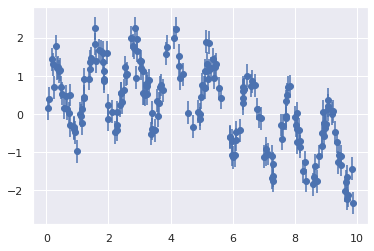

In [ ]:
#適当なsin波を生成
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    #細かいsin波
    fast_oscillation = np.sin(5 * x)
    #大きいsin波
    slow_oscillation = np.sin(0.5 * x)
    #ブレ
    noise = sigma * rng.randn(len(x))
    #3つを足した
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

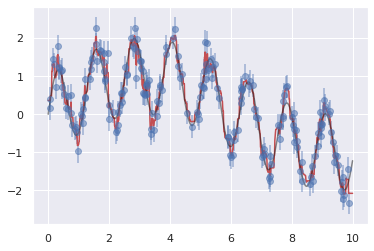

In [ ]:
#sklearnのランダムフォレスト(回帰)はRandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#決定木200
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

#適当なテストデータを生成してpredict
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);
#→だいたいあってる

ランダムフォレストによる数字分類

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
#列確認
#data:8*8のバイナリ(画像)
#target:画像に書いてある数字
#images:画像データ

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


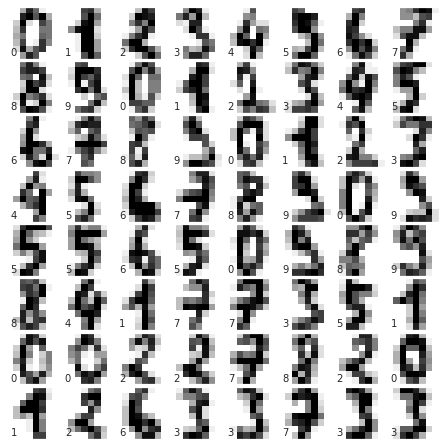

In [ ]:
#画像を見てみる
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
#学習データとテストデータに分割
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
#RandomForestClassifierでfitしてpredict
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
#精度を見てみる
#だいたい良い
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.96      0.98      0.97        47
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



 - precision=適合率  
→TP/TP+FP  
 - recall=再現率  
→TP/TP+FN  
 - f1-score=F値  
=2*precision*recall/precision+recall  
 - support=正解データの個数

 https://qiita.com/FukuharaYohei/items/be89a99c53586fa4e2e4

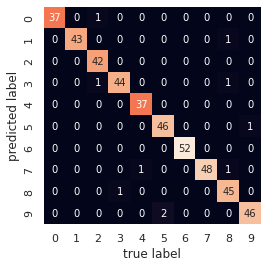

In [ ]:
#ヒートマップで見てみる
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');